# Data Transform Ensemble for Classification

In [1]:
# evaluate decision tree on synthetic classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.817 (0.047)


In [16]:
# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

In [17]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
ensemble = get_ensemble()

In [19]:
ensemble

VotingClassifier(estimators=[('norm',
                              Pipeline(steps=[('s', MinMaxScaler()),
                                              ('m',
                                               DecisionTreeClassifier())])),
                             ('std',
                              Pipeline(steps=[('s', StandardScaler()),
                                              ('m',
                                               DecisionTreeClassifier())])),
                             ('robust',
                              Pipeline(steps=[('s', RobustScaler()),
                                              ('m',
                                               DecisionTreeClassifier())])),
                             ('power',
                              Pipeline(steps=[('s', PowerTransformer()),
                                              ('m',
                                               DecisionTreeClassifier())])),
                             ('quant',
         

In [6]:
# evaluate data transform bagging ensemble on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	return ensemble

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get models
ensemble = get_ensemble()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.833 (0.037)


>norm: 0.824 (0.045)
>std: 0.818 (0.041)
>robust: 0.825 (0.037)
>power: 0.827 (0.048)
>quant: 0.825 (0.038)
>kbins: 0.834 (0.034)
>ensemble: 0.830 (0.039)


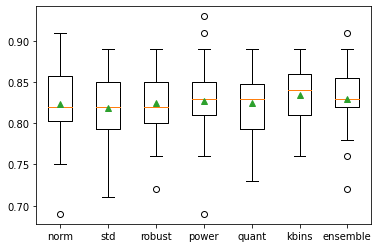

In [20]:
# comparison of data transform ensemble to each contributing member for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeClassifier())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeClassifier())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingClassifier(estimators=models, voting='hard')
	# return a list of tuples each with a name and model
	return models + [('ensemble', ensemble)]

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# get models
models = get_ensemble()
# evaluate each model
results = list()
for name,model in models:
	# define the evaluation method
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model on the dataset
	n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# report performance
	print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))
	results.append(n_scores)
# plot the results for comparison
pyplot.boxplot(results, labels=[n for n,_ in models], showmeans=True)
pyplot.show()

In [9]:
ens=get_ensemble()

In [14]:
ens[1]

('std',
 Pipeline(steps=[('s', StandardScaler()), ('m', DecisionTreeClassifier())]))

# Data Transform Ensemble for Regression

In [21]:
# evaluate decision tree on synthetic regression dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -141.159 (12.371)


>norm: -139.960 (10.399)
>std: -140.433 (11.228)
>robust: -141.488 (11.379)
>power: -140.661 (10.826)
>quant: -140.349 (11.887)
>kbins: -148.447 (12.795)
>ensemble: -126.244 (9.592)


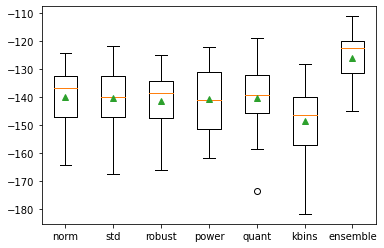

In [22]:
# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeRegressor())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return models + [('ensemble', ensemble)]

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# get models
models = get_ensemble()
# evaluate each model
results = list()
for name,model in models:
	# define the evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model on the dataset
	n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# report performance
	print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))
	results.append(n_scores)
# plot the results for comparison
pyplot.boxplot(results, labels=[n for n,_ in models], showmeans=True)
pyplot.show()

>norm: -141.157 (13.375)
>std: -140.316 (11.840)
>robust: -161.483 (11.219)
>power: -141.170 (10.443)
>quant: -141.718 (10.054)
>kbins: -161.577 (11.221)
>ensemble: -124.659 (9.268)


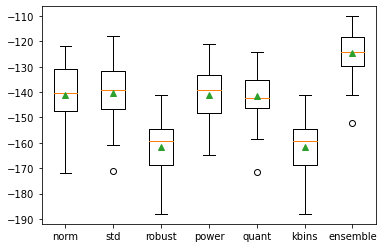

In [23]:
# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', KNeighborsRegressor())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', SVR())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', KNeighborsRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', SVR())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return models + [('ensemble', ensemble)]

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# get models
models = get_ensemble()
# evaluate each model
results = list()
for name,model in models:
	# define the evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model on the dataset
	n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# report performance
	print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))
	results.append(n_scores)
# plot the results for comparison
pyplot.boxplot(results, labels=[n for n,_ in models], showmeans=True)
pyplot.show()

In [24]:
# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', KNeighborsRegressor())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', SVR())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', KNeighborsRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', SVR())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# get models
model = get_ensemble()
model=model.fit(X,y)

R^2: 0.5441462975864797
Prediction Interval: 12.183
95% likelihood that the true value is between -1.783 and 22.583
Predicted value: 18.203, real value: 10.400
R^2: 0.6872238518753775
Prediction Interval: 10.091
95% likelihood that the true value is between 0.309 and 20.491
Predicted value: 16.845, real value: 10.400
R^2: 0.8476458137319688
Prediction Interval: 7.043
95% likelihood that the true value is between 3.357 and 17.443
Predicted value: 13.981, real value: 10.400


C:\Users\Asus\Anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Asus\Anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


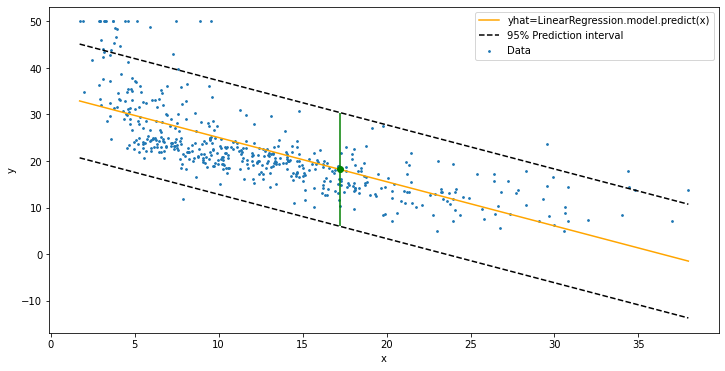

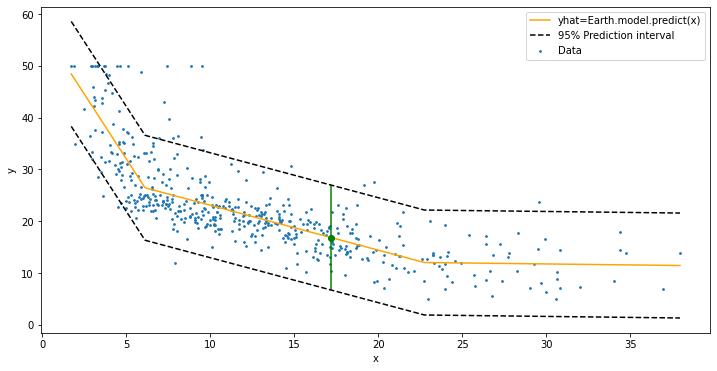

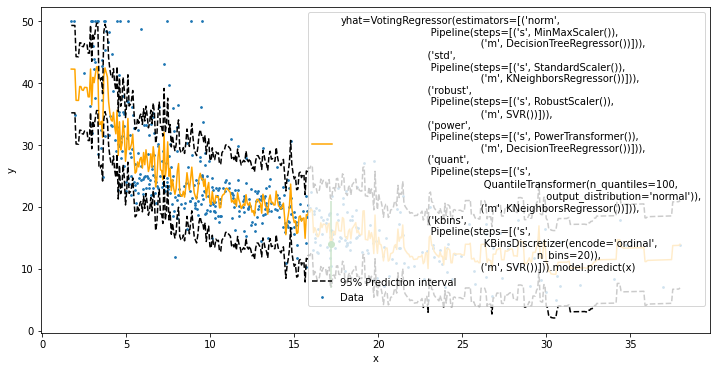

In [50]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pyearth import Earth
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from numpy import sum as arraysum
from numpy import sqrt

# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', KNeighborsRegressor())])
	models.append(('std', std))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', SVR())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', KNeighborsRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', SVR())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble




# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

data=data.values
# prepare data
x = data[:,12].reshape(-1,1)
y = data[:,13]
n = len(y)

def predband(x, xd, yd, model, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = 0  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - model.predict(xd)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = model.predict(x)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

#model = get_ensemble()
models=[LinearRegression(),Earth(), get_ensemble()]

for model in models:

    model= model
    model=model.fit(x,y)
    yhat=model.predict(x)

    # compute r^2
    r2 = 1.0-(sum((y-yhat)**2)/((n-1.0)*np.var(y,ddof=1)))
    print('R^2: ' + str(r2))



    # calculate regression confidence interval
    px =  np.linspace(min(x), max(x), len(x))
    # aproximated func
    py = model.predict(px)
    lpb, upb = predband(px, x, y, model, conf=0.95)

    # define new input, expected value and prediction
    x_in = x[380]
    y_out = y[380]
    yhat_out = yhat[380]
    # estimate stdev of yhat
    sum_errs = arraysum((y - yhat)**2)
    stdev = sqrt(1/(len(y)-2) * sum_errs)
    # calculate prediction interval
    interval = 1.96 * stdev


    fig=plt.figure(figsize=(12,6))

    # plot data
    plt.scatter(x, y, s=3, label='Data')

    # plot the regression
    plt.plot(px, py, c='orange', label='yhat='+str(model)[:-2]+'.model.predict(x)')
    plt.plot(px, lpb[0], 'k--',label='95% Prediction interval')
    plt.plot(px, upb[0], 'k--')
    plt.errorbar(x_in, yhat_out, yerr=interval, color='green', fmt='o')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='best')

    print('Prediction Interval: %.3f' % interval)
    lower, upper = y_out - interval, y_out + interval
    print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
    print('Predicted value: %.3f, real value: %.3f' % (yhat_out, y_out))
   
    # save and show figure
    #plt.savefig('regression.png')

R^2: 0.4939780509516368
Prediction Interval: 11.874
95% likelihood that the true value is between 9.826 and 33.574
Predicted value: 18.815, real value: 21.700
R^2: 0.5779507870735934
Prediction Interval: 10.844
95% likelihood that the true value is between 10.856 and 32.544
Predicted value: 18.682, real value: 21.700
R^2: 0.5782391325194569


C:\Users\Asus\Anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Asus\Anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\Asus\Anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the fut

Prediction Interval: 10.841
95% likelihood that the true value is between 10.859 and 32.541
Predicted value: 18.753, real value: 21.700


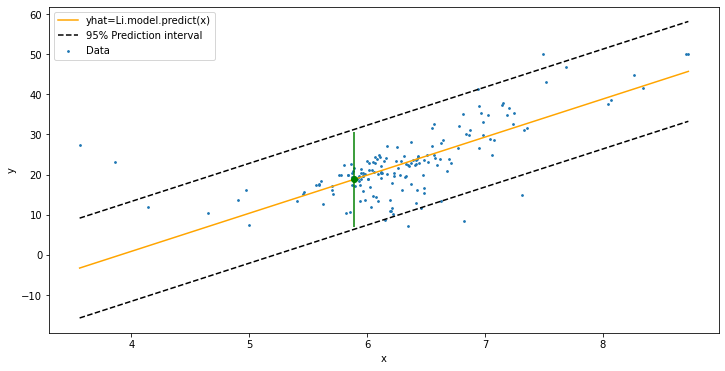

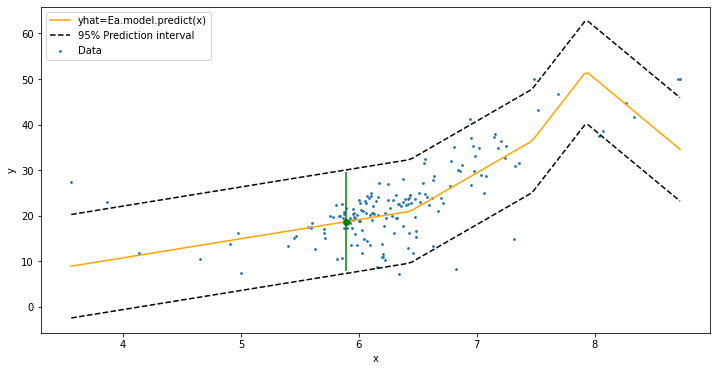

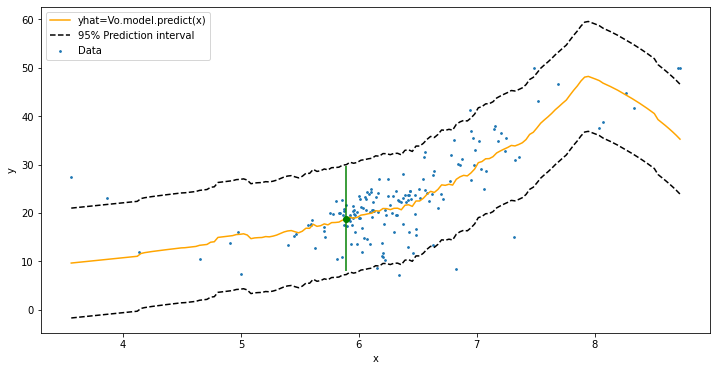

In [82]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pyearth import Earth
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from numpy import sum as arraysum
from numpy import sqrt
from sklearn.model_selection import train_test_split

# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', Earth())])
	models.append(('norm', norm))
	norm1 = Pipeline([('s', MinMaxScaler()), ('m', KNeighborsRegressor())])
	models.append(('norm1', norm1))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', Earth())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', Earth())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', Earth())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', Earth())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', Earth())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', Earth())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble




# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

data=data.values
# prepare data
x = data[:,5].reshape(-1,1)
y = data[:,13]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33)
n = len(y_test)

def predband(x, xd, yd, model, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = 0  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - model.predict(xd)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = model.predict(x)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

#model = get_ensemble()
models=[LinearRegression(),Earth(), get_ensemble()]

for model in models:

    model= model
    x=X_train
    y=y_train
    
    model=model.fit(x,y)
    x=X_test
    y=y_test
    
    yhat=model.predict(x)

    # compute r^2
    r2 = 1.0-(sum((y-yhat)**2)/((n-1.0)*np.var(y,ddof=1)))
    print('R^2: ' + str(r2))



    # calculate regression confidence interval
    px =  np.linspace(min(x), max(x), len(x))
    # aproximated func
    py = model.predict(px)
    lpb, upb = predband(px, x, y, model, conf=0.95)

    # define new input, expected value and prediction
    x_in = x[100]
    y_out = y[100]
    yhat_out = yhat[100]
    # estimate stdev of yhat
    sum_errs = arraysum((y - yhat)**2)
    stdev = sqrt(1/(len(y)-2) * sum_errs)
    # calculate prediction interval
    interval = 1.96 * stdev


    fig=plt.figure(figsize=(12,6))

    # plot data
    plt.scatter(x, y, s=3, label='Data')

    # plot the regression
    plt.plot(px, py, c='orange', label='yhat='+str(model)[:2]+'.model.predict(x)')
    plt.plot(px, lpb[0], 'k--',label='95% Prediction interval')
    plt.plot(px, upb[0], 'k--')
    plt.errorbar(x_in, yhat_out, yerr=interval, color='green', fmt='o')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend(loc='best')

    print('Prediction Interval: %.3f' % interval)
    lower, upper = y_out - interval, y_out + interval
    print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
    print('Predicted value: %.3f, real value: %.3f' % (yhat_out, y_out))
   
    # save and show figure
    #plt.savefig('regression.png')

# Пробую обучить на всех данных

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pyearth import Earth
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from numpy import sum as arraysum
from numpy import sqrt
from sklearn.model_selection import train_test_split

# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', Earth())])
	models.append(('norm', norm))
	norm1 = Pipeline([('s', MinMaxScaler()), ('m', KNeighborsRegressor())])
	models.append(('norm1', norm1))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', Earth())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', Earth())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', Earth())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', Earth())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', Earth())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', Earth())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble


In [93]:
# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

dataset=data.values
# prepare data
x = dataset[:,:13]#.reshape(-1,1)
y = dataset[:,13]

In [94]:
x.shape

(506, 13)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [101]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt    
from scipy import stats
import pandas as pd
from pyearth import Earth
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from numpy import sum as arraysum
from numpy import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# comparison of data transform ensemble to each contributing member for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
# get a voting ensemble of models
def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', Earth())])
	models.append(('norm', norm))
	norm1 = Pipeline([('s', MinMaxScaler()), ('m', KNeighborsRegressor())])
	models.append(('norm1', norm1))
	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', Earth())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', Earth())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', Earth())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', Earth())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', Earth())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', Earth())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = None)

dataset=data.values
# prepare data
X = dataset[:,:13]#.reshape(-1,1)
y = dataset[:,13]

In [102]:
# define the model
model = Earth()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.617 (0.358)


In [104]:
# define the model
model = get_ensemble()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -2.365 (0.331)


In [135]:
np.warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

def get_ensemble7():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', RandomForestRegressor())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', RandomForestRegressor())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', RandomForestRegressor())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', RandomForestRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', RandomForestRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', RandomForestRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', RandomForestRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble6():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', XGBRegressor())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', XGBRegressor())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures(5)), ('m', XGBRegressor())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', XGBRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', XGBRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', XGBRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', XGBRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble1():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', Earth())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', Earth())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', Earth())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', Earth())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', Earth())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', Earth())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', Earth())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble2():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', LinearRegression())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', LinearRegression())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', LinearRegression())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', LinearRegression())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', LinearRegression())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', LinearRegression())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', LinearRegression())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble3():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeRegressor())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', DecisionTreeRegressor())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', DecisionTreeRegressor())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', DecisionTreeRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble4():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', SVR())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', SVR())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', SVR())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', SVR())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', SVR())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', SVR())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', SVR())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble5():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', KNeighborsRegressor())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', KNeighborsRegressor())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', KNeighborsRegressor())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', KNeighborsRegressor())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', KNeighborsRegressor())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', KNeighborsRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', KNeighborsRegressor())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

def get_ensemble():
	# define the base models
	models = list()
	# normalization
	norm = Pipeline([('s', MinMaxScaler()), ('m', Earth())])
	models.append(('norm', norm))

	# standardization
	std = Pipeline([('s', StandardScaler()), ('m', SVR())])
	models.append(('std', std))
	std1 = Pipeline([('s', PolynomialFeatures()), ('m', LinearRegression())])
	models.append(('std1', std1))
	# robust
	robust = Pipeline([('s', RobustScaler()), ('m', Earth())])
	models.append(('robust', robust))
	# power
	power = Pipeline([('s', PowerTransformer()), ('m', SVR())])
	models.append(('power', power))
	# quantile
	quant = Pipeline([('s', QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m', DecisionTreeRegressor())])
	models.append(('quant', quant))
	# kbins
	kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m', Earth())])
	models.append(('kbins', kbins))
	# define the voting ensemble
	ensemble = VotingRegressor(estimators=models)
	# return a list of tuples each with a name and model
	return ensemble

from sklearn.metrics import mean_absolute_error, mean_squared_error
# import data
url= 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
data=pd.read_csv(url, header = 0)

dataset=data.values
# prepare data
X = dataset[:,:13]#.reshape(-1,1)
y = dataset[:,13]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=1)
names=['Earth', 'linear','DT', 'SVR', 'KN', 'mix','xgb', 'RF']
models=[get_ensemble1(),get_ensemble2(), get_ensemble3(), get_ensemble4(), 
        get_ensemble5(), get_ensemble(),get_ensemble6(), get_ensemble7()]
for model,name in zip(models,names):
    model=model.fit(X_train,y_train)
    yhat=model.predict(X_test)
    score=mean_absolute_error(y_test,yhat)
    print('Model: %.3s, MAE: %.3f' % (name,score))

Model: Ear, MAE: 2.424
Model: lin, MAE: 3.268
Model: DT, MAE: 2.730
Model: SVR, MAE: 3.804
Model: KN, MAE: 2.958
Model: mix, MAE: 2.555
Model: xgb, MAE: 2.038
Model: RF, MAE: 2.266
